# 単一始点最短経路問題１ Bellman-Ford method  
始点を固定した時に，他の全ての頂点との間の最短経路を求める問題を単一始点最短経路問題と言います．さらに，終点を固定したものを２頂点つい最短経路問題と言いますが，同じ計算量で単一始点最短経路問題が解ける．よってここでは単一始点最短経路問題を解く．　　

まず，始点$s$から頂点$i$への最短距離を$d_i$とする．この時，次の式が成り立つ．

$$
    d_i = \min \left[ d_j + c_{ji} | e=(j,i) \in \rm E  \right]
$$

ここで$c_ji$は頂点$j$から頂点$i$の辺のコストである．もしグラフがDAGであれば，頂点を順序づけられるので，この漸化式を用いて$d$を計算することができる．　　

ただし，グラフに閉路が含まれる場合は順に計算できない．その場合でも，頂点$i$への仮の最短距離を$d_i$として，初期値$d_s = 0, d_i = \infty$として，この式を繰り返し適用して$d$を更新していくことで$d$を求めることができる．  
負の閉路が存在しない限り更新は有限回で収まり，その時$d$は最短距離となっている．

In [32]:
import graphviz as gvz
g = gvz.Graph(format = 'png')
g.attr('node', shape = 'circle')

node_list = list(range(7))
edge_list = [[0, 1, 2], [0, 2, 5], [1, 2, 4], 
                      [2, 3, 2], [1, 3, 6], [1, 4, 10], 
                      [3, 5, 1], [4, 5, 3], [4, 6, 5],
                      [5, 6, 9]]

In [33]:
for v in node_list:
    g.node(str(v))

In [34]:
for vs, vg, w in edge_list:
    g.edge(str(vs), str(vg), str(w))

In [35]:
g.render('ex3')

'ex3.png'

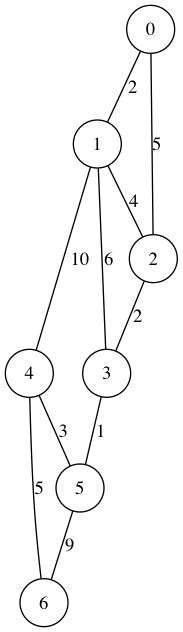

In [37]:
from IPython.display import Image, display_png
display_png(Image('ex3.png'))

### Answer  
$$
    {\rm A \rightarrow C \rightarrow D \rightarrow F \rightarrow G }
$$
16

---  
### 重み付きDAGの実装

In [3]:
class WDAG():
    def __init__(self):
        self.vertex_list = []
        self.edge_dict = {}


    def vertex_exist(self, v):
        return v in self.vertex_list


    def edge_exist(self, vs, vg):
        if not self.vertex_exist(vs) or not self.vertex_exist(vg):
            return 'vertex exists error'
        else:
            return vg in [v for v, w in self.edge_dict[vs]]


    def add_vertex(self, v):
        if not self.vertex_exist(v):
            self.vertex_list.append(v)
            self.edge_dict[v] = []
        else:
            return 'vertex exists error'


    def add_edge(self, vs, vg, w):
        if not self.edge_exist(vs, vg):
            self.edge_dict[vs].append([vg, w])
        else:
            return 'edge exists error'


    def rm_vertex(self, v):
        if self.vertex_exist(v):
            self.vertex_list.pop(self.vertex_list.index(v))
            self.edge_dict.pop(v)            
        else:
            return 'given vertex dose not exist'


    def rm_edge(self, vs, vg):
        if self.edge_exist(vs, vg):
            self.edge_dict[vs].pop([v for v, w in self.edge_dict[vs]].index(vg))
        else:
            return 'given edge does not exist'


    def adj_vertex(self, v):
        if self.vertex_exist(v):
            return self.edge_dict.pop(v)
        else:
            return 'vertex exists error'


    def degree(self, v):
        if self.vertex_exist(v):
            return len(self.edge_dict[v])
        else:
            return 'vertex exists error'


    def show(self):
        print(self.vertex_list)
        print(self.edge_dict)